mengubah gambar menjadi array. lalu di simpan kedalam pickle
https://pythonprogramming.net/python-pickle-module-save-objects-serialization/

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
from google.colab import drive 
drive.mount('/content/drive')

DATADIR = "/content/drive/My Drive/Skripsi/select/test_selektif"
# r=root, d=directories, f = files
folders = []
for r, d, f in os.walk(DATADIR):
    for folder in sorted(d):
        folders.append(os.path.join(r, folder))

for d in folders:
    print(d)
    

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Skripsi/select/test_selektif/harimau
/content/drive/My Drive/Skripsi/select/test_selektif/jaguar
/content/drive/My Drive/Skripsi/select/test_selektif/macantutul
/content/drive/My Drive/Skripsi/select/test_selektif/singa


##Lokasi folder

In [0]:
# r=root, d=directories, f = files
folders = []
for r, d, f in os.walk(DATADIR):
    for folder in sorted(d):
        folders.append(os.path.join(r, folder))

for d in folders:
    print(d)

/content/drive/My Drive/Skripsi/select/test_selektif/harimau
/content/drive/My Drive/Skripsi/select/test_selektif/jaguar
/content/drive/My Drive/Skripsi/select/test_selektif/macantutul
/content/drive/My Drive/Skripsi/select/test_selektif/singa


In [0]:
CATEGORIES = sorted(os.listdir(DATADIR))
print(CATEGORIES)

['harimau', 'jaguar', 'macantutul', 'singa']


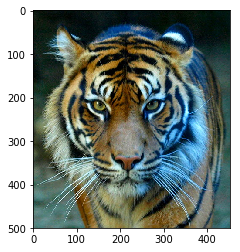

In [0]:
import cv2
import matplotlib.pyplot as plt

for category in CATEGORIES:  # untuk looping setiap kategori "harimau", "jaguar","macantutul","singa"
    path = os.path.join(DATADIR,category)  # definisi lokasi gambar
    for img in os.listdir(path):  # perulangan gambar tiap category
        img_array = cv2.imread(os.path.join(path,img),cv2.COLOR_BGR2RGB)  # konversi array rgb
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

##Resize

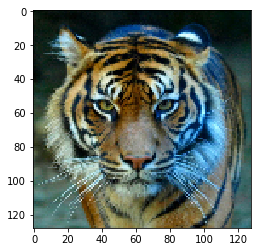

In [0]:
#untuk resize ukuran gambar

IMG_SIZE = 128

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE),cv2.COLOR_BGR2RGB) #cv2.COLOR_BGR2RGB
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [0]:
print('ukuran gambar : ', img_array.shape)

ukuran gambar :  (500, 452, 3)


In [0]:
print('ukuran gambar setelah di reshape : ', new_array.shape)

ukuran gambar setelah di reshape :  (128, 128, 3)


In [0]:
#membuat array untuk data training

testing_data = []

In [0]:
from tqdm import tqdm
#fungsi untuk persiapan penyimpanan data

def create_testing_data():
    for category in CATEGORIES: 
        path = os.path.join(DATADIR,category)  # path untuk lokasi gambar
        class_num = CATEGORIES.index(category)  # get the classification  (0, 1, 2, 3) angkanya urut nama  (harimau, jaguar, macan tutul, singa)

        for img in tqdm(os.listdir(path)):  # iterasi gambar setiap kelas
            try:
                img_array = cv2.imread(os.path.join(path,img))  # konversi ke array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize gambar
                testing_data.append([new_array, class_num])  # Memassukan ke training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass

create_testing_data()

100%|██████████| 50/50 [00:25<00:00,  1.95it/s]


In [0]:
print("Total gambar : ", len(testing_data))

Total gambar :  200


In [0]:
import random
random.shuffle(testing_data)
for sample in testing_data[:10]:
    print("label : ", CATEGORIES[sample[1]])

label :  harimau
label :  jaguar
label :  singa
label :  harimau
label :  singa
label :  harimau
label :  jaguar
label :  singa
label :  singa
label :  macantutul


cek label data

In [0]:
X = [] #gambar
y = [] #label

In [0]:
for features,label in testing_data:
    X.append(features)
    y.append(label)

In [0]:
import numpy as np

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3) 

In [0]:
print("Jumlah gambar serta ukuran : ",X.shape)

Jumlah gambar serta ukuran :  (200, 128, 128, 3)


In [0]:
import pickle

pickle_out = open("/content/drive/My Drive/Skripsi/setdata/X_test.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("/content/drive/My Drive/Skripsi/select/y_test.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [0]:
#Memuat data 
import pickle

pickle_in = open("/content/drive/My Drive/Skripsi/setdata/X_test.pickle","rb")
X_raw = pickle.load(pickle_in)

pickle_in = open("/content/drive/My Drive/Skripsi/setdata/y_test.pickle","rb")
y_raw = pickle.load(pickle_in)



In [0]:
# mengubah tipe data menjadi float
X_load_float = X_raw.astype('float32')
print(X_load_float[0])

[[[ 60. 104. 141.]
  [ 86. 111. 139.]
  [ 98. 123. 142.]
  ...
  [ 40.  64.  88.]
  [ 30.  50.  72.]
  [ 33.  50.  68.]]

 [[ 67. 105. 137.]
  [ 99. 121. 145.]
  [110. 132. 152.]
  ...
  [ 34.  58.  81.]
  [ 41.  64.  87.]
  [ 28.  48.  68.]]

 [[ 99. 129. 152.]
  [107. 126. 144.]
  [117. 140. 157.]
  ...
  [ 34.  58.  82.]
  [ 32.  56.  80.]
  [ 28.  52.  72.]]

 ...

 [[123. 131. 144.]
  [109. 120. 130.]
  [112. 118. 129.]
  ...
  [ 89.  98. 111.]
  [ 98. 107. 120.]
  [ 77.  90. 105.]]

 [[ 73.  81.  95.]
  [ 73.  85.  98.]
  [ 78.  84.  96.]
  ...
  [ 54.  67.  79.]
  [103. 116. 128.]
  [102. 118. 133.]]

 [[ 91.  99. 116.]
  [106. 121. 135.]
  [110. 119. 132.]
  ...
  [102. 119. 131.]
  [ 74.  90. 102.]
  [ 49.  64.  81.]]]


In [0]:
X_load_float = X_load_float/255


In [0]:
print(X_load_float[0])

[[[0.23529412 0.40784314 0.5529412 ]
  [0.3372549  0.43529412 0.54509807]
  [0.38431373 0.48235294 0.5568628 ]
  ...
  [0.15686275 0.2509804  0.34509805]
  [0.11764706 0.19607843 0.28235295]
  [0.12941177 0.19607843 0.26666668]]

 [[0.2627451  0.4117647  0.5372549 ]
  [0.3882353  0.4745098  0.5686275 ]
  [0.43137255 0.5176471  0.59607846]
  ...
  [0.13333334 0.22745098 0.31764707]
  [0.16078432 0.2509804  0.34117648]
  [0.10980392 0.1882353  0.26666668]]

 [[0.3882353  0.5058824  0.59607846]
  [0.41960785 0.49411765 0.5647059 ]
  [0.45882353 0.54901963 0.6156863 ]
  ...
  [0.13333334 0.22745098 0.32156864]
  [0.1254902  0.21960784 0.3137255 ]
  [0.10980392 0.20392157 0.28235295]]

 ...

 [[0.48235294 0.5137255  0.5647059 ]
  [0.42745098 0.47058824 0.50980395]
  [0.4392157  0.4627451  0.5058824 ]
  ...
  [0.34901962 0.38431373 0.43529412]
  [0.38431373 0.41960785 0.47058824]
  [0.3019608  0.3529412  0.4117647 ]]

 [[0.28627452 0.31764707 0.37254903]
  [0.28627452 0.33333334 0.38431373]


In [0]:
# class to_categorical kita butuhkan dari library keras
from keras.utils import np_utils
num_class = 4

y_train_ohe = np_utils.to_categorical(y_raw, num_class)

Using TensorFlow backend.


In [0]:
import numpy as np

print('Bentuk X_train sekarang : ', X_raw.shape)
print('Bentuk y_val sekarang : ', np.array(y_train_ohe).shape)


Bentuk X_train sekarang :  (598, 128, 128, 3)
Bentuk y_val sekarang :  (598, 4)


In [0]:
print('nama , label , One-hot encoding')

for i in range (0, 10):
  
  print(CATEGORIES[y_raw[i]],',',y_raw[i],',',y_train_ohe[i])
  i = i+1

nama , label , One-hot encoding
singa , 3 , [0. 0. 0. 1.]
jaguar , 1 , [0. 1. 0. 0.]
jaguar , 1 , [0. 1. 0. 0.]
macantutul , 2 , [0. 0. 1. 0.]
harimau , 0 , [1. 0. 0. 0.]
harimau , 0 , [1. 0. 0. 0.]
harimau , 0 , [1. 0. 0. 0.]
harimau , 0 , [1. 0. 0. 0.]
jaguar , 1 , [0. 1. 0. 0.]
jaguar , 1 , [0. 1. 0. 0.]


In [0]:
  import pickle

  pickle_out = open("/content/drive/My Drive/Skripsi/setdata/chosen/X_test.pickle","wb")
  pickle.dump(X, pickle_out)
  pickle_out.close()

  pickle_out = open("/content/drive/My Drive/Skripsi/setdata/chosen/y_test.pickle","wb")
  pickle.dump(y, pickle_out)
  pickle_out.close()